<h1>Final Project<h1>

<h2> Understanding The Business Problem<h2>

Problem Statement:
This project aimed to analyze the factors that influence the market price of
laptops, including Brand, Central Processing Unit (CPU), Pixels Per Inch
(PPI), and other significant features.
  
Techniques such as
Linear Regression, Decision Tree Regression, and Random Forest Regression
were employed to predict the prices of laptops from leading companies in
the Global Computer Hardware Manufacturing Industry. 

Why does it matter?

The primary goal of this analysis is to
offer a comprehensive overview of pricing strategies for market analysts,
technology companies, and other industry practitioners.

Business Benefits:

These insights will highlight the most profitable features in the market,
aiding companies in conducting profit analysis for their products.

Research Question and Goal(s)

Predict a continuous numerical value, which is the price of a laptop, based on
various independent variables such as Brand, CPU, RAM, Storage, Screen Size, and
other specifications.

<h2>Analytics Problem Framing<h2>

The Machine Learning Algorithm of Choice: 
Techniques such as
Linear Regression, Decision Tree Regression, and Random Forest Regression
were employed to predict the prices of laptops from leading companies in
the Global Computer Hardware Manufacturing Industry. (Linear Regression was most accurate!)


Predetermined Metric of Success: RMSE

Why: This metric highlights the average amount of error from the model when tested on the Test Dataset



<h2>Exploratory Data Analysis<h2>


In [2]:
#Desriptive Statistics

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
pathname = "/Users/michaelwhitfield/Library/CloudStorage/GoogleDrive-purduemacademics@gmail.com/My Drive/Purdue Senior Year/Summer24/MGMT 473/Data Files/laptop_price.csv"

laptop_df = pd.read_csv(pathname, sep=",", encoding="latin-1")

laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<h3> Exploring Values within Data <h3>

<h6> Checking Unique Values <h6>

In [4]:
for column in laptop_df.columns:
    print(f'{column} has {laptop_df[column].nunique()} unique values')

laptop_ID has 1303 unique values
Company has 19 unique values
Product has 618 unique values
TypeName has 6 unique values
Inches has 18 unique values
ScreenResolution has 40 unique values
Cpu has 118 unique values
Ram has 9 unique values
Memory has 39 unique values
Gpu has 110 unique values
OpSys has 9 unique values
Weight has 179 unique values
Price_euros has 791 unique values


In [5]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
#Since there are no values missing I will not need to complete any imputing of values
for column in laptop_df.columns:
    print(f"{column} has {laptop_df[column].isna().sum()} missing values")

laptop_ID has 0 missing values
Company has 0 missing values
Product has 0 missing values
TypeName has 0 missing values
Inches has 0 missing values
ScreenResolution has 0 missing values
Cpu has 0 missing values
Ram has 0 missing values
Memory has 0 missing values
Gpu has 0 missing values
OpSys has 0 missing values
Weight has 0 missing values
Price_euros has 0 missing values


In [7]:
laptop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.0,331.5,659.0,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.60,18.4
Price_euros,1303.0,1123.686992,699.009043,174.0,599.0,977.0,1487.88,6099.0


<h3> Feature Engineering <h3>

<h6>Change Price from Euros to US Dollar (In 2020 US Dollars)<h6>

'''This is in 2020 US Dollars because The dataset was created 4 years ago, so I will use the Exchange Rate of the 
Euro to Dollar in 2020'''


In [8]:
laptop_df["Price"] = laptop_df["Price_euros"] *1.42

<h6>Change Weight to be a Numerical Value since it has a reasonable 179 categories (13% of observations are in 
differentcategories!)<h6>

In [9]:
laptop_df["Weight"] = laptop_df["Weight"].str.replace("kg", "")
laptop_df["Weight_in_(kg)"] = pd.to_numeric(laptop_df["Weight"], errors='coerce')
laptop_df.drop(["Price_euros","Weight"], axis=1, inplace=True)
laptop_df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,Weight_in_(kg)
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1902.3598,1.37
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1276.4948,1.34
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,816.5000,1.86
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,3603.1790,1.83
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,2561.1120,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,905.9600,1.80
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,2128.5800,1.30
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,325.1800,1.50
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,1084.8800,2.19


<h6>Fixing Screen Resolution<h6>

Summary:
Screen Resolutions currently contains string values. A string will be 
interpreted as a meaningless vector when fed into a machine learning model, so its best to break up 
ScreenResolution into different columns that can better indicate the effect of screen resolution on price. 

Step 1: Convert Key words such as "Retina Display" and "Full HD" into Hot-Encoded Dummy Variables
Reason: These Marketing Buzzwords do not effectively display how the screen looks to the human eye, but may still 
have a large effect on perceived price and therefore actual price.

Step 2: Convert Screen resolution to Pixels Per Inch (PPI) to understand Screens Pixel Density.
Reason: This conversion will provide a clearer understanding of the screen resolution's impact on visual quality from a human perspective.

In [10]:
import re

def screen_resolution_transformer(string):
    match = re.search(r'((?:\D+\/\s*)*\D*)\s*(\d.*)', string)
    if match:
        keywords = match.group(1)
        dimensions = match.group(2)
        
        if not keywords or keywords.isspace():
            return "None",dimensions
        return keywords, dimensions
    else:
        return string, ""
#Step 1
laptop_df[["Monitor Panel","Screen Dimension"]] = laptop_df["ScreenResolution"].apply(lambda x: pd.Series
(screen_resolution_transformer(x)))

# For the sake of simplicity and I removed the observations that had multiple keywords from the dataset
laptop_df = laptop_df[~laptop_df["ScreenResolution"].str.contains("/")]

In [11]:
import numpy as np
#Step 2
laptop_df["Screen Dimension"] = laptop_df["Screen Dimension"].apply(lambda x: re.search(r'(\d{3,5}x\d{3,5})',
                                                                                                x).group())
laptop_df[["Width", "Height"]] = laptop_df["Screen Dimension"].str.split("x", expand= True)
laptop_df['Width'] = laptop_df['Width'].astype(int)
laptop_df['Height'] = laptop_df['Height'].astype(int)

laptop_df['Diagonal_Pixels'] = np.sqrt(laptop_df['Width']**2 + laptop_df['Height']**2)
laptop_df['PPI'] = laptop_df['Diagonal_Pixels'] / laptop_df['Inches'].astype(float)
laptop_df["PPI"] = laptop_df["PPI"].round(2)

laptop_df.drop(columns=['Width', 'Height',"Diagonal_Pixels", "Screen Dimension", "ScreenResolution"], inplace= True)

laptop_df

/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1122315447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df["Screen Dimension"] = laptop_df["Screen Dimension"].apply(lambda x: re.search(r'(\d{3,5}x\d{3,5})',
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1122315447.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df[["Width", "Height"]] = laptop_df["Screen Dimension"].str.split("x", expand= True)
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipyke

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Price,Weight_in_(kg),Monitor Panel,PPI
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1902.3598,1.37,IPS Panel Retina Display,226.98
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1276.4948,1.34,None,127.68
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,816.5000,1.86,Full HD,141.21
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,3603.1790,1.83,IPS Panel Retina Display,220.53
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,2561.1120,1.37,IPS Panel Retina Display,226.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,296.7800,1.17,None,135.09
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,1022.8544,2.20,None,100.45
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,325.1800,1.50,None,111.94
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,1084.8800,2.19,None,100.45


<h6>Updating Memory Column<h6>

Step 1: Separate actual memory storage capacity from Memory Storage Type

Step 2: Convert all Memory into a common value. All Memory observations will be measured in 
Terabytes


In [12]:
#Step 1
laptop_df[["Memory Capacity","Memory Type", "Memory Storage Type"]] = laptop_df["Memory"].str.extract("(\d*\.?\d+)(GB|TB)"
                                                                                                  "\s*(\w+)", expand = True)
#Step 2
laptop_df['Memory Capacity'] = laptop_df['Memory Capacity'].astype(float)
laptop_df.loc[laptop_df['Memory Type'] == 'GB', 'Memory Capacity'] /= 1024
laptop_df["Memory Capacity (TB)"] = laptop_df["Memory Capacity"].round(3)
laptop_df.drop(columns=["Memory", "Memory Capacity", "Memory Type"], inplace= True)

/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/3093221778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df[["Memory Capacity","Memory Type", "Memory Storage Type"]] = laptop_df["Memory"].str.extract("(\d*\.?\d+)(GB|TB)"
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/3093221778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df[["Memory Capacity","Memory Type", "Memory Storage Type"]] = laptop_df["Memory"].str.extract("(\d*\.?\d+)(GB|TB)"
/var/folde

<h6>Converting RAM to Numerical Value<h6>

In [13]:
laptop_df["Ram"] = laptop_df["Ram"].str.replace("GB", "")
laptop_df["Ram (GB)"] = laptop_df["Ram"].astype(int)
laptop_df.drop(columns= ["Ram"], inplace= True)

/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1630919126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df["Ram"] = laptop_df["Ram"].str.replace("GB", "")
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1630919126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df["Ram (GB)"] = laptop_df["Ram"].astype(int)
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1630919126.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

<h6>Visualizing Data<h6>

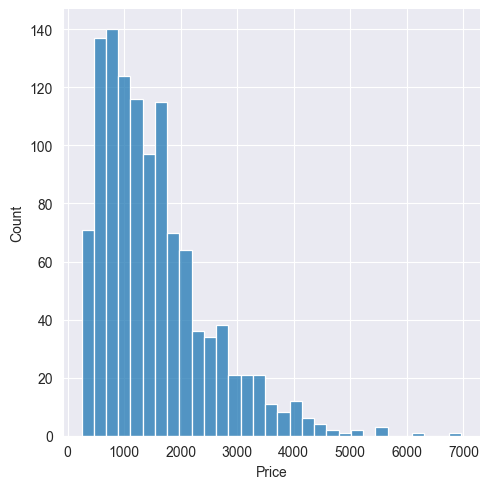

In [14]:
import seaborn as sns
#Clearly Right Skewed
#Data Will be logged for normalization purposes
sns.displot(laptop_df["Price"])

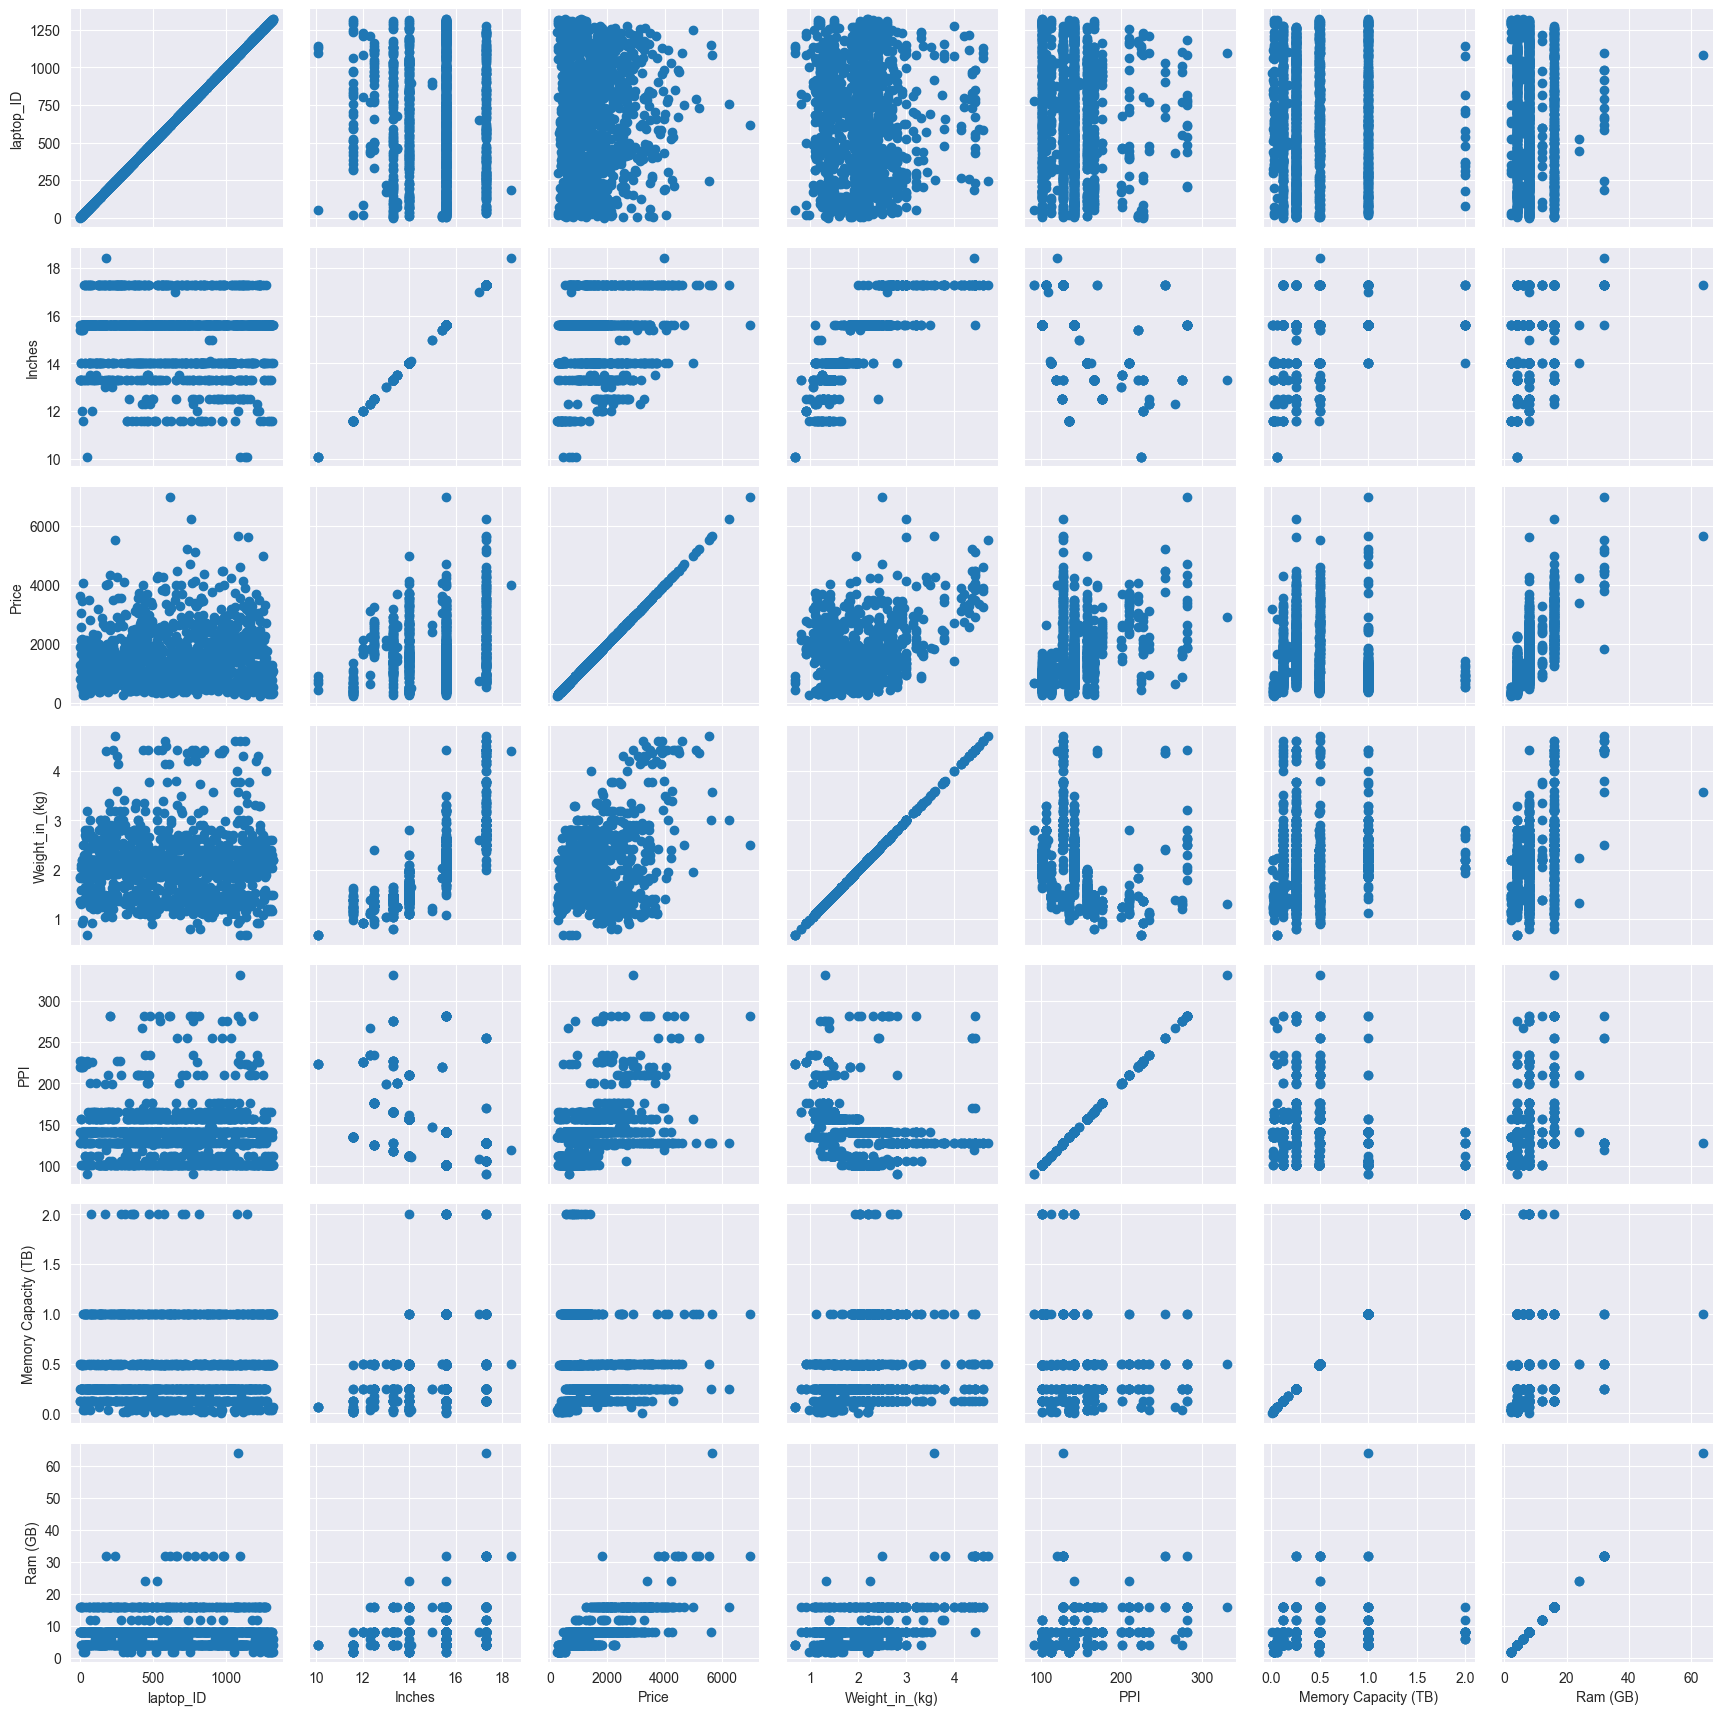

In [15]:
pair_grid = sns.PairGrid(laptop_df, palette="autumn")
pair_grid = pair_grid.map(plt.scatter)

In [16]:
'''Below Are Variables That I consider to be correlated when looking at the scatter plots'''
#Price on Inches
#Weight_in(kg) on Inches

'''After Analyzing the scatter and correlation table for numerical variables, it seems that inches and weight are 
highly correlated. Their pearson correlation coefficient is above .8! I will run further analysis to see which one I 
will keep.'''
laptop_df.corr(numeric_only= True)
laptop_df.drop(columns=["Inches"])

,laptop_ID,Company,Product,TypeName,Cpu,Gpu,OpSys,Price,Weight_in_(kg),Monitor Panel,PPI,Memory Storage Type,Memory Capacity (TB),Ram (GB)
0,1,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,macOS,1902.3598,1.37,IPS Panel Retina Display,226.98,SSD,0.125,8
1,2,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,Intel HD Graphics 6000,macOS,1276.4948,1.34,None,127.68,Flash,0.125,8
2,3,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,No OS,816.5000,1.86,Full HD,141.21,SSD,0.250,8
3,4,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,AMD Radeon Pro 455,macOS,3603.1790,1.83,IPS Panel Retina Display,220.53,SSD,0.500,16
4,5,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,macOS,2561.1120,1.37,IPS Panel Retina Display,226.98,SSD,0.250,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1314,HP,Stream 11-Y000na,Netbook,Intel Celeron Dual Core N3060 1.6GHz,Intel HD Graphics 400,Windows 10,296.7800,1.17,None,135.09,Flash,0.031,2
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,Intel Core i7 6500U 2.5GHz,Nvidia GeForce 920M,Windows 10,1022.8544,2.20,None,100.45,HDD,0.488,4
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,Intel Celeron Dual Core N3050 1.6GHz,Intel HD Graphics,Windows 10,325.1800,1.50,None,111.94,Flash,0.062,2
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7 6500U 2.5GHz,AMD Radeon R5 M330,Windows 10,1084.8800,2.19,None,100.45,HDD,1.000,6


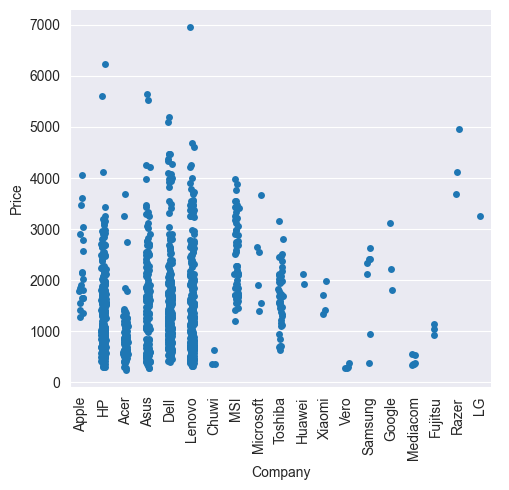

In [17]:
company_scatter_plot = sns.catplot(data=laptop_df, x="Company", y="Price")
company_scatter_plot.set_xticklabels(rotation=90)
company_scatter_plot.figure.tight_layout()
company_scatter_plot.savefig("Data", dpi=600)

/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/545377394.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  company_scatter_plot = sns.barplot(data=laptop_df, x="Company", y="Price", palette="autumn")
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/545377394.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  company_scatter_plot.set_xticklabels(labels=laptop_df["Company"], rotation=90)


[Text(0, 0, 'Apple'),
 Text(1, 0, 'Apple'),
 Text(2, 0, 'HP'),
 Text(3, 0, 'Apple'),
 Text(4, 0, 'Apple'),
 Text(5, 0, 'Acer'),
 Text(6, 0, 'Apple'),
 Text(7, 0, 'Apple'),
 Text(8, 0, 'Asus'),
 Text(9, 0, 'Acer'),
 Text(10, 0, 'HP'),
 Text(11, 0, 'HP'),
 Text(12, 0, 'Apple'),
 Text(13, 0, 'Dell'),
 Text(14, 0, 'Apple'),
 Text(15, 0, 'Apple'),
 Text(16, 0, 'Dell'),
 Text(17, 0, 'Apple'),
 Text(18, 0, 'Lenovo')]

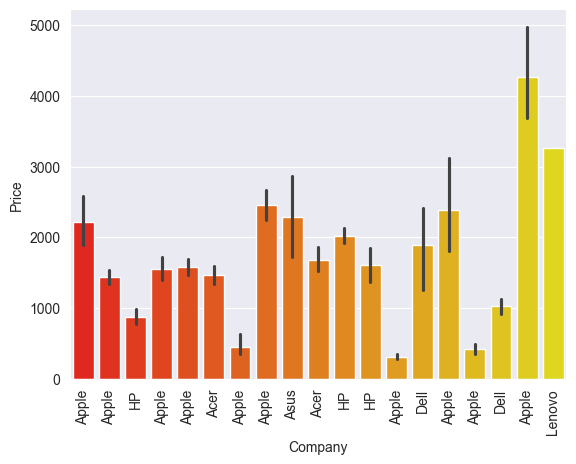

In [18]:
company_scatter_plot = sns.barplot(data=laptop_df, x="Company", y="Price", palette="autumn")
company_scatter_plot.set_xticklabels(labels=laptop_df["Company"], rotation=90)


In [19]:
laptop_df.query('Price > 6500' )

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Gpu,OpSys,Price,Weight_in_(kg),Monitor Panel,PPI,Memory Storage Type,Memory Capacity (TB),Ram (GB)
610,617,Lenovo,Thinkpad P51,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,Nvidia Quadro M2200M,Windows 10,6956.58,2.5,IPS Panel,282.42,SSD,1.0,32


In [20]:

#Drop 610

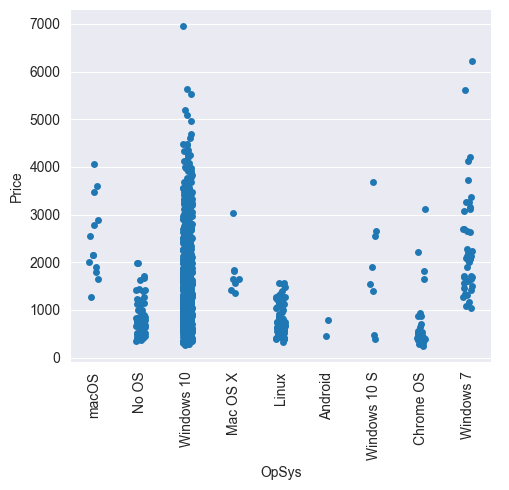

In [21]:
op_sys_scatter_plot = sns.catplot(data=laptop_df, x="OpSys", y="Price")
op_sys_scatter_plot.set_xticklabels(rotation=90)
op_sys_scatter_plot.figure.tight_layout()
op_sys_scatter_plot.savefig("Data2", dpi=600)

/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1541914052.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  op_sys_bar_plot = sns.barplot(data=laptop_df, x="OpSys", y="Price", palette="autumn")
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1541914052.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  op_sys_bar_plot.set_xticklabels(labels= [


[Text(0, 0, 'Mac OS'),
 Text(1, 0, 'No OS'),
 Text(2, 0, 'Windows 10'),
 Text(3, 0, 'Mac OS X'),
 Text(4, 0, 'Linux'),
 Text(5, 0, 'Android'),
 Text(6, 0, 'Windows 10 S'),
 Text(7, 0, 'Chrome OS'),
 Text(8, 0, 'Windows 7')]

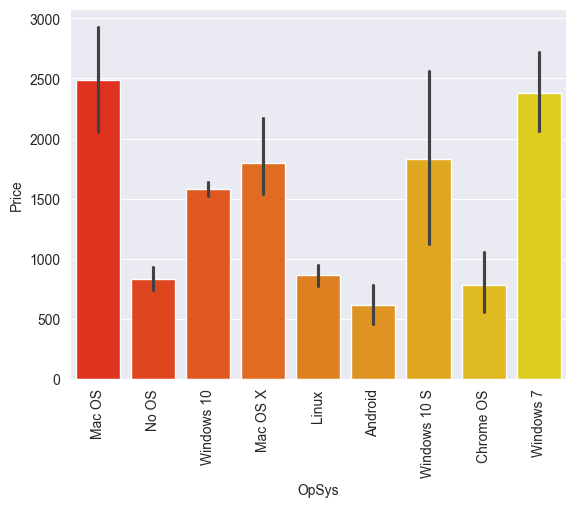

In [22]:
op_sys_bar_plot = sns.barplot(data=laptop_df, x="OpSys", y="Price", palette="autumn")
op_sys_bar_plot.set_xticklabels(labels= [
                                         "Mac OS",
                                          "No OS", 
                                          "Windows 10",
                                          "Mac OS X",
                                          "Linux",
                                          "Android",
                                          "Windows 10 S",
                                          "Chrome "
                                          "OS","Windows 7"
                                         ], 
                                         rotation=90
                                  )

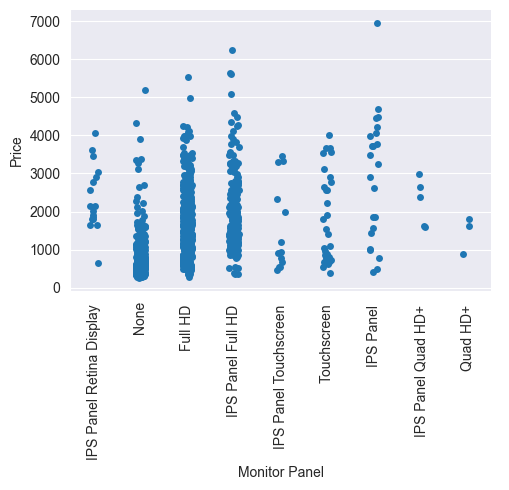

In [23]:
screen_keywords_scatter_plot = sns.catplot(data=laptop_df, x="Monitor Panel", y="Price")
screen_keywords_scatter_plot.set_xticklabels(rotation=90)
screen_keywords_scatter_plot.figure.tight_layout()
screen_keywords_scatter_plot.savefig("Data3", dpi=600)

/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1971702090.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  screen_keywords_bar_plot.set_xticklabels(labels= ["Full HD", "None", "IPS Panel Full HD", "Touchscreen", "IPS "


AttributeError: 'Axes' object has no attribute 'savefig'

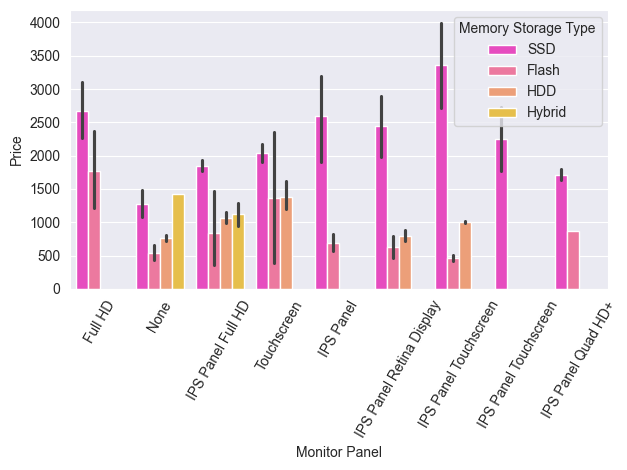

In [24]:

screen_keywords_bar_plot = sns.barplot(data=laptop_df, x="Monitor Panel", y="Price", hue= "Memory Storage Type",
palette="spring")
screen_keywords_bar_plot.set_xticklabels(labels= ["Full HD", "None", "IPS Panel Full HD", "Touchscreen", "IPS "
                                                      "Panel","IPS Panel Retina Display", " IPS Panel Touchscreen",
                                                      "IPS Panel Touchscreen", "IPS Panel Quad HD+"], 
                                             rotation=60)

screen_keywords_bar_plot.figure.tight_layout()
screen_keywords_bar_plot.savefig("use_for_class2.png", dpi =600)

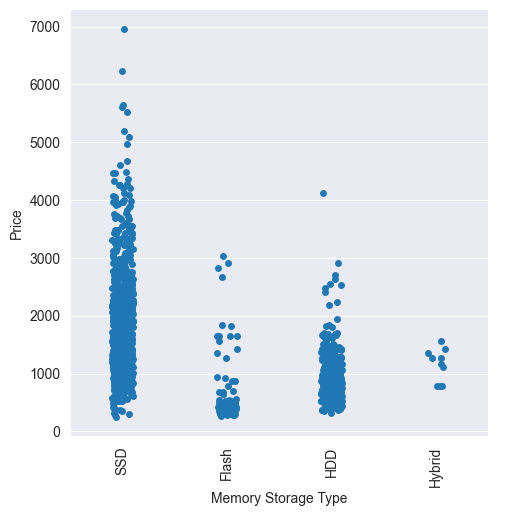

In [25]:
memory_keywords_scatter_plot = sns.catplot(data=laptop_df, x="Memory Storage Type", y="Price")
memory_keywords_scatter_plot.set_xticklabels(rotation=90)

/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/3917217996.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  memory_keywords_bar_plot = sns.barplot(data=laptop_df, x="Memory Storage Type", y="Price", palette="autumn")
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/3917217996.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  memory_keywords_bar_plot.set_xticklabels(labels=laptop_df["Memory Storage Type"], rotation=90)


[Text(0, 0, 'SSD'), Text(1, 0, 'Flash'), Text(2, 0, 'SSD'), Text(3, 0, 'SSD')]

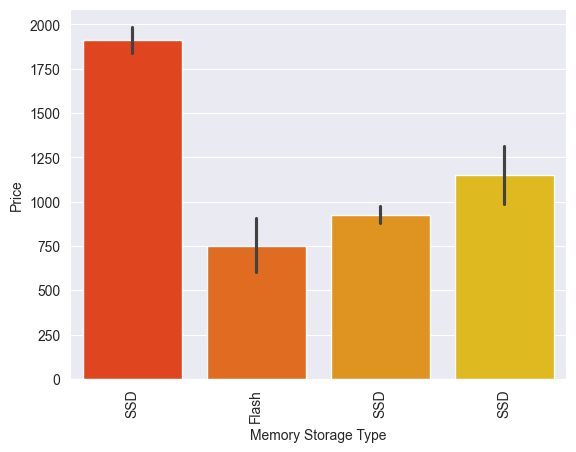

In [26]:
memory_keywords_bar_plot = sns.barplot(data=laptop_df, x="Memory Storage Type", y="Price", palette="autumn")
memory_keywords_bar_plot.set_xticklabels(labels=laptop_df["Memory Storage Type"], rotation=90)
#There seems to be an extreme outlier within SSD

<h6>checking for outliers<h6>

In [27]:
from scipy import stats
stats.zscore(laptop_df['Price']).sort_values().tail(10)

1081    3.211305
744     3.298749
1231    3.595169
780     3.728262
723     3.832898
238     4.174671
1136    4.262708
1066    4.300650
749     4.914240
610     5.670112
Name: Price, dtype: float64

In [28]:
from scipy import stats
'''It seems that these few are pretty significant outliers!'''
laptop_df.drop(610, inplace=True)
laptop_df.drop(723, inplace= True)
laptop_df.drop(238, inplace= True)
laptop_df.drop(1136, inplace= True)
laptop_df.drop(1066, inplace= True)
laptop_df.drop(749, inplace= True)


/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1898329288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df.drop(610, inplace=True)
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1898329288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop_df.drop(723, inplace= True)
/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/1898329288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

<h2>Introducing Models<h2>

<h4>Standarzing and Transfroming DataFrame<h4>
<h6>Dimension Reduction of Choice: Lasso Regression<h6>

In [29]:
laptop_df

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Gpu,OpSys,Price,Weight_in_(kg),Monitor Panel,PPI,Memory Storage Type,Memory Capacity (TB),Ram (GB)
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,macOS,1902.3598,1.37,IPS Panel Retina Display,226.98,SSD,0.125,8
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,Intel HD Graphics 6000,macOS,1276.4948,1.34,None,127.68,Flash,0.125,8
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,No OS,816.5000,1.86,Full HD,141.21,SSD,0.250,8
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,AMD Radeon Pro 455,macOS,3603.1790,1.83,IPS Panel Retina Display,220.53,SSD,0.500,16
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,macOS,2561.1120,1.37,IPS Panel Retina Display,226.98,SSD,0.250,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,Intel HD Graphics 400,Windows 10,296.7800,1.17,None,135.09,Flash,0.031,2
1297,1315,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,Intel Core i7 6500U 2.5GHz,Nvidia GeForce 920M,Windows 10,1022.8544,2.20,None,100.45,HDD,0.488,4
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,Intel HD Graphics,Windows 10,325.1800,1.50,None,111.94,Flash,0.062,2
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,AMD Radeon R5 M330,Windows 10,1084.8800,2.19,None,100.45,HDD,1.000,6


In [30]:
X = laptop_df.drop(columns=["Price"])
#Price could be logged because logging price give the amount of change in percentages which will normalize the
# distribution
y = np.log(laptop_df["Price"])

In [31]:
from sklearn.impute import SimpleImputer
#Standardizing and Transforming Data
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

'''Before I start Regression Techniques I must Standardize and Transform Dataset'''
ohe_list = ["Company", "Product", "TypeName","Cpu", "Gpu","OpSys", "Monitor Panel","Memory Storage Type"]
num_list = list(laptop_df.drop(columns=["Price"]).select_dtypes(include=['int64','float64']).columns)

num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

one_hot_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('impute', SimpleImputer(strategy='most_frequent'))
])

col_transformer = ColumnTransformer(transformers=[
    ("num_p", num_pipeline, num_list),
    ("ohe_p",one_hot_pipeline, ohe_list),
    ],
    remainder='passthrough',
    n_jobs=-1)

preprocessing_pipeline= Pipeline(
    steps=[
        ("preprocessing", col_transformer) 
    ])

In [32]:
X_preprocessed = preprocessing_pipeline.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state= 23 )

<h6>Linear Regression Model<h6>

In [34]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

parameter_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
lasso = Lasso(tol=1e-3)
lasso.fit(X_train,y_train)

Lasso(tol=0.001)

In [35]:
lasso_cv = GridSearchCV(estimator= lasso,param_grid= parameter_grid ,cv=5,n_jobs=-1)

In [36]:
lasso_cv.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, estimator=Lasso(tol=0.001), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [37]:
y_pred_lasso_cv =lasso_cv.predict(X_test)

In [38]:
lasso_cv.best_estimator_

Lasso(alpha=0.0001, tol=0.001)

In [39]:
best_lasso = lasso_cv.best_estimator_
coefficients = best_lasso.coef_
encoded_features = col_transformer.named_transformers_['ohe_p']['ohe'].get_feature_names_out(ohe_list)
all_features = list(encoded_features) + num_list

count = 0

for feature, coef in zip(all_features, coefficients):
    if coef != 0:
        print(f"Feature: {feature}, Coefficient: {coef}")
        count += 1
print(count)

Feature: Company_Acer, Coefficient: 0.041063050971731956
Feature: Company_Apple, Coefficient: -0.029577110806776878
Feature: Company_Asus, Coefficient: 0.03805270722233744
Feature: Company_Chuwi, Coefficient: 0.04357999133577167
Feature: Company_Dell, Coefficient: 0.01675270229363133
Feature: Company_Fujitsu, Coefficient: 0.10575478996210845
Feature: Company_Google, Coefficient: -0.16733426074385074
Feature: Company_HP, Coefficient: 0.20581035297580977
Feature: Company_Huawei, Coefficient: -0.035647944085038734
Feature: Company_LG, Coefficient: -0.05358968214990554
Feature: Company_MSI, Coefficient: -0.03118068983082848
Feature: Company_Mediacom, Coefficient: 0.05689218669692577
Feature: Company_Microsoft, Coefficient: -0.07140328757141515
Feature: Company_Razer, Coefficient: 0.016062351729214865
Feature: Company_Samsung, Coefficient: 0.46134391686809234
Feature: Company_Toshiba, Coefficient: -0.08349912136227838
Feature: Company_Xiaomi, Coefficient: -0.31821515845442744
Feature: Produ

In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso_cv))
r2 = r2_score(y_test, y_pred_lasso_cv)

# Print best parameters and relevant scores
print(f"Best alpha from GridSearchCV: {lasso_cv.best_params_['alpha']}")
print(f"Best cross-validated score: {lasso_cv.best_score_}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Best alpha from GridSearchCV: 0.0001
Best cross-validated score: 0.8846161802962005
Root Mean Squared Error (RMSE): 0.178603444960825
R-squared: 0.9209396242420947


<h6> Deciscion Tree Model<h6>


In [41]:
from sklearn.tree import DecisionTreeRegressor 

parameter_grid_dtr = {
    'max_depth': [3,5,8,10,12,15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'ccp_alpha': [0.001,0.01, 0.1, 1, 10, 100]
}

dtr = DecisionTreeRegressor(max_depth=8)
dtr_cv = GridSearchCV(dtr, parameter_grid_dtr, cv=5, n_jobs=-1 )
dtr_cv.fit(X_train,y_train)
y_pred_dtr = dtr_cv.predict(X_test)


rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred_dtr))
r2_dtr = r2_score(y_test, y_pred_dtr)
print(f"Best max depth from GridSearchCV: {dtr_cv.best_params_['max_depth']}")
print(f"Best cross-validated score: {dtr_cv.best_score_}")
print(f"Root Mean Squared Error (RMSE): {rmse_dtr}")
print(f"R-squared: {r2_dtr}")

Best max depth from GridSearchCV: 15
Best cross-validated score: 0.7935992498470081
Root Mean Squared Error (RMSE): 0.2586853172493619
R-squared: 0.8341472145673251


<h6>Extra: Random Forest<h6>

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
parameter_grid_rfr = {
    'n_estimators': [10,20,40,80,120,140],
    'max_samples': [0.1,0.5,0.8],
    'max_features': [0.7,0.75,0.8],
    'max_depth': [3,5,8,10,12,15]
}

rfr = RandomForestRegressor()
rfr_cv = GridSearchCV(dtr, parameter_grid_rfr, cv=5, n_jobs=-1 )
dtr_cv.fit(X_train,y_train)
y_pred_rfr = dtr_cv.predict(X_test)


rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred_rfr))
r2_rfr = r2_score(y_test, y_pred_rfr)
print(f"Best max depth from GridSearchCV: {dtr_cv.best_params_['max_depth']}")
print(f"Best cross-validated score: {dtr_cv.best_score_}")
print(f"Root Mean Sqaured Error (MSE): {rmse_rfr}")
print(f"R-squared: {r2_rfr}")

Best max depth from GridSearchCV: 15
Best cross-validated score: 0.7935992498470082
Root Mean Sqaured Error (MSE): 0.2586853172493618
R-squared: 0.8341472145673252


/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/2963298815.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_r2 = sns.barplot(x='Model',y="R-Squared", data=r2_df, palette= "spring")


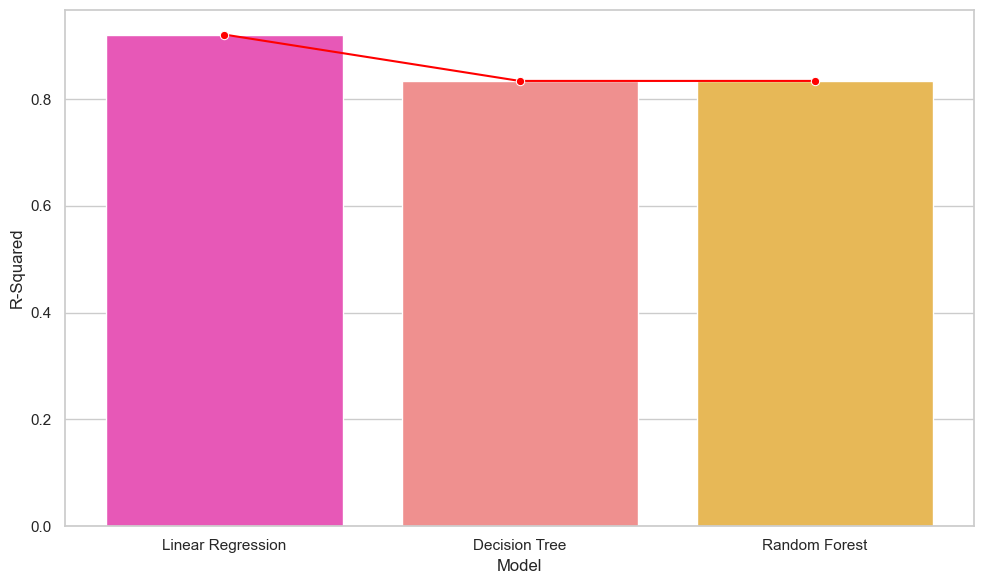

In [43]:
r2_data = {"Model": ["Linear Regression", 'Decision Tree', 'Random Forest'],
             "R-Squared": [r2, r2_dtr, r2_rfr]
             }
r2_df = pd.DataFrame(r2_data)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
bar_plot_r2 = sns.barplot(x='Model',y="R-Squared", data=r2_df, palette= "spring")
line_plot_r2 = sns.lineplot(x='Model', y='R-Squared', data=r2_df, sort=False, marker='o', color='red')
bar_plot_r2.figure.tight_layout()
bar_plot_r2.figure.savefig("use_for_class_r2.png", dpi =600)

/var/folders/74/3jkrg3dx64s64xkfpvy__vjr0000gn/T/ipykernel_31167/3651355990.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot_rmse = sns.barplot(x='Model',y="RMSE", data=rmse_df, palette= "spring")


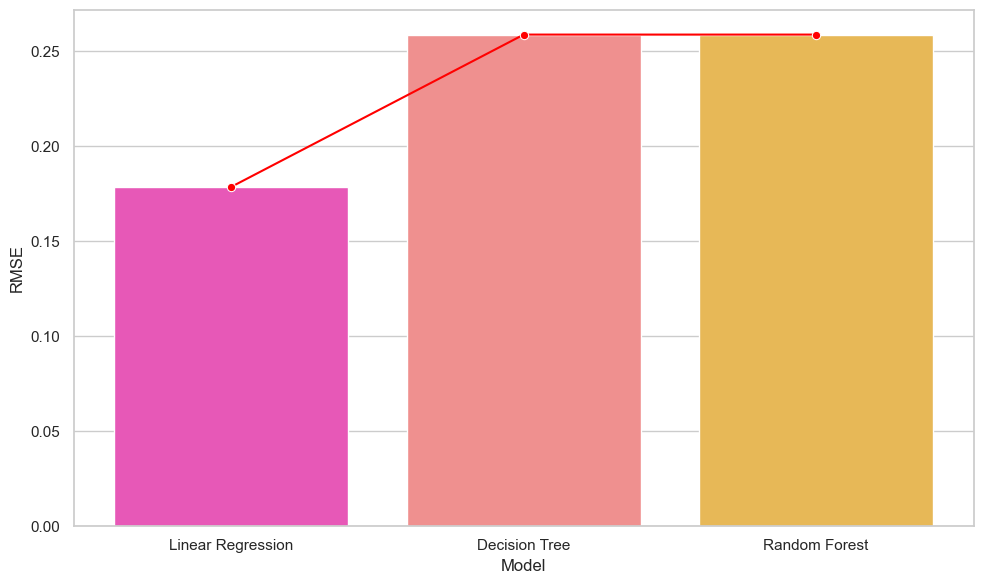

In [44]:
rmse_data = {"Model": ["Linear Regression", 'Decision Tree', 'Random Forest'],
             "RMSE": [rmse, rmse_dtr, rmse_rfr]
             }
rmse_df = pd.DataFrame(rmse_data)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
bar_plot_rmse = sns.barplot(x='Model',y="RMSE", data=rmse_df, palette= "spring")
line_plot_rmse = sns.lineplot(x='Model', y='RMSE', data=rmse_df, sort=False, marker='o', color='red')
bar_plot_rmse.figure.tight_layout()
bar_plot_rmse.figure.savefig("use_for_class_rmse.png", dpi =600)